In [30]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
from openpyxl import Workbook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',family='Malgun Gothic')

chrome_options = Options()
chrome_options.add_experimental_option("detach", True)

service = Service(executable_path=ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

driver.get("https://www.koreabaseball.com/")

In [209]:
record= driver.find_element(By.CSS_SELECTOR,'#lnb > li:nth-child(2)')
record.click()
team_record= driver.find_element(By.CSS_SELECTOR,'#contents > div.sub-content > div.tab-depth1 > ul > li:nth-child(2)')
team_record.click()
pitcher=driver.find_element(By.CSS_SELECTOR,'#contents > div.sub-content > div.tab-depth2 > ul > li:nth-child(2)')
pitcher.click()
choose_contents_p=driver.find_element(By.CSS_SELECTOR,'#cphContents_cphContents_cphContents_udpContent > div.compare > div.styled-select03.mt5')
choose_contents_p.click()
choose_regseason_p=driver.find_element(By.CSS_SELECTOR,'#cphContents_cphContents_cphContents_ddlSeries_ddlSeries > option:nth-child(1)')
choose_regseason_p.click()

sleep(1)

total=driver.find_elements(By.CSS_SELECTOR,'#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr')

wb1=Workbook()
wb2=Workbook()
wb3=Workbook()

#팀(투수)에 관한 데이터
ws_pitcher=wb1.active
ws_pitcher.title='team_pitcher_record'


data_pitcher=[
    ['순위(평균자책)','팀명','ERA(평균자책)']
]
for i in range(len(total)):
    team_ranking_p=driver.find_element(By.CSS_SELECTOR,f'#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr:nth-child({i+1}) > td:nth-child(1)').text
    team_name_p=driver.find_element(By.CSS_SELECTOR,f'#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr:nth-child({i+1}) > td:nth-child(2)').text
    team_era_p=driver.find_element(By.CSS_SELECTOR,f'#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr:nth-child({i+1}) > td.asc').text
    data_pitcher.append([team_ranking_p,team_name_p,team_era_p])

for row in data_pitcher:
    ws_pitcher.append(row)

wb1.save("KBO_23_team_pitcher.xlsx")

#팀(타자)에 관한 데이터
ws_batter=wb2.active
ws_batter.title='team_batter_record'

batter=driver.find_element(By.CSS_SELECTOR,'#contents > div.sub-content > div.tab-depth2 > ul > li:nth-child(1)')

batter.click()

choose_contents_b=driver.find_element(By.CSS_SELECTOR,'#cphContents_cphContents_cphContents_udpContent > div.compare > div.styled-select03.mt5')
choose_contents_b.click()
choose_regseason_b=driver.find_element(By.CSS_SELECTOR,'#cphContents_cphContents_cphContents_ddlSeries_ddlSeries > option:nth-child(1)')
choose_regseason_b.click()
sleep(1)
#ws_batter = wb.create_sheet(title='team_batter_record')

data_batter = [
    ['순위(타율)', '팀명', '타율']
]

for i in range(len(total)):
    team_ranking_b=driver.find_element(By.CSS_SELECTOR,f'#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr:nth-child({i+1}) > td:nth-child(1)').text
    team_name_b=driver.find_element(By.CSS_SELECTOR,f'#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr:nth-child({i+1}) > td:nth-child(2)').text
    team_era_b=driver.find_element(By.CSS_SELECTOR,f'#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr:nth-child({i+1}) > td.asc').text
    data_batter.append([team_ranking_b,team_name_b,team_era_b])

for row in data_batter:
    ws_batter.append(row)

wb2.save("KBO_23_team_batter.xlsx")

#팀 순위와 승률에 관한 데이터
ws_team=wb3.active
ws_team.title='team_data'

#ws_team = wb.create_sheet(title='team_data')
team_ranking=driver.find_element(By.CSS_SELECTOR,'#snb > li:nth-child(2)')
team_ranking.click()
sleep(1)

data_team=[
    ['순위','팀명','승률']
]

for i in range(len(total)):
    team_ranking=driver.find_element(By.CSS_SELECTOR,f'#cphContents_cphContents_cphContents_udpRecord > table > tbody > tr:nth-child({i+1}) > td:nth-child(1)').text
    team_name=driver.find_element(By.CSS_SELECTOR,f'#cphContents_cphContents_cphContents_udpRecord > table > tbody > tr:nth-child({i+1}) > td:nth-child(2)').text
    team_winrate=driver.find_element(By.CSS_SELECTOR,f'#cphContents_cphContents_cphContents_udpRecord > table > tbody > tr:nth-child({i+1}) > td:nth-child(7)').text
    data_team.append([team_ranking,team_name,team_winrate])

for row in data_team:
    ws_team.append(row)

wb3.save("KBO_23_team_data.xlsx")

In [210]:
kbo_batter_file = pd.DataFrame(data_batter[1:], columns=['순위(타율)', '팀명', '타율'])
kbo_batter_file.set_index('팀명', inplace=True)
kbo_batter_file.to_csv('./KBO_23_team_batter.csv', encoding='utf-8')

kbo_pitcher_file = pd.DataFrame(data_pitcher[1:], columns=['순위(평균자책)', '팀명', 'ERA(평균자책)'])
kbo_pitcher_file.set_index('팀명', inplace=True)
kbo_pitcher_file.to_csv('./KBO_23_team_pitcher.csv', encoding='utf-8')

kbo_data_file = pd.DataFrame(data_team[1:], columns=['순위','팀명','승률'])
kbo_data_file.set_index('팀명', inplace=True)
kbo_data_file.to_csv('./KBO_23_team_data.csv', encoding='utf-8')

In [211]:
# 인덱스를 기준으로 조인
pit_rank_data = pd.merge(kbo_data_file, kbo_pitcher_file, left_index=True, right_index=True)
bat_rank_data=pd.merge(kbo_data_file,kbo_batter_file,left_index=True, right_index=True)

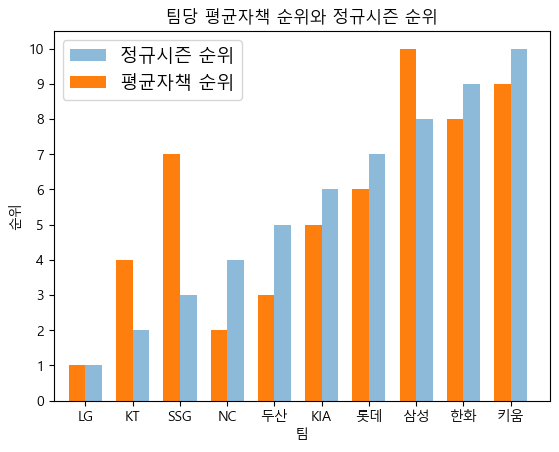

In [187]:
# 바 차트 그리기
bar_width = 0.35  # 바의 너비
bar_positions1 = range(len(pit_rank_data.index))  # 평균자책 순위의 바 위치
bar_positions2 = [pos + bar_width for pos in bar_positions1]  # 정규시즌 순위의 바 위치

plt.bar(bar_positions2, pit_rank_data['순위'].astype(int), width=bar_width, label='정규시즌 순위', alpha=0.5)  # alpha로 투명도 조절
plt.bar(bar_positions1, pit_rank_data['순위(평균자책)'].astype(int), width=bar_width, label='평균자책 순위')

# 축과 제목 설정
plt.xlabel('팀')
plt.ylabel('순위')
plt.title('팀당 평균자책 순위와 정규시즌 순위')
plt.xticks([pos + bar_width / 2 for pos in bar_positions1], pit_rank_data.index)  # 팀명을 바 중앙에 표시
plt.legend(loc='best', ncol=1, fontsize=13, frameon=True)
plt.axis([-0.5,10,0,10.5])
plt.yticks(range(11))

# 그래프 보여주기
plt.show()

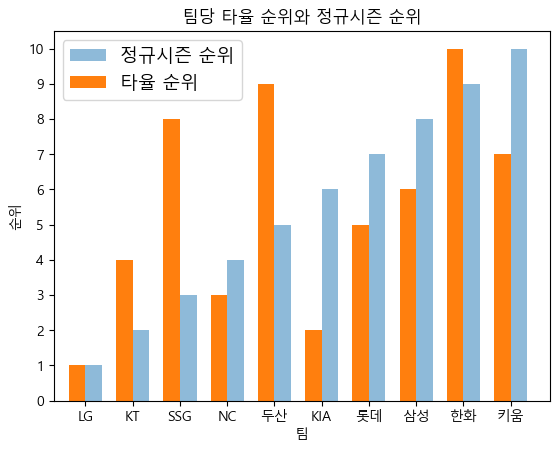

In [221]:
# 바 차트 그리기
bar_width = 0.35  # 바의 너비
bar_positions1 = range(len(bat_rank_data.index))  # 평균자책 순위의 바 위치
bar_positions2 = [pos + bar_width for pos in bar_positions1]  # 정규시즌 순위의 바 위치

plt.bar(bar_positions2, bat_rank_data['순위'].astype(int), width=bar_width, label='정규시즌 순위', alpha=0.5)  # alpha로 투명도 조절
plt.bar(bar_positions1, bat_rank_data['순위(타율)'].astype(int), width=bar_width, label='타율 순위')

# 축과 제목 설정
plt.xlabel('팀')
plt.ylabel('순위')
plt.title('팀당 타율 순위와 정규시즌 순위')
plt.xticks([pos + bar_width / 2 for pos in bar_positions1], bat_rank_data.index)  # 팀명을 바 중앙에 표시
plt.legend(loc='best', ncol=1, fontsize=13, frameon=True)
plt.axis([-0.5,10,0,10.5])
plt.yticks(range(11))

# 그래프 보여주기
plt.show()

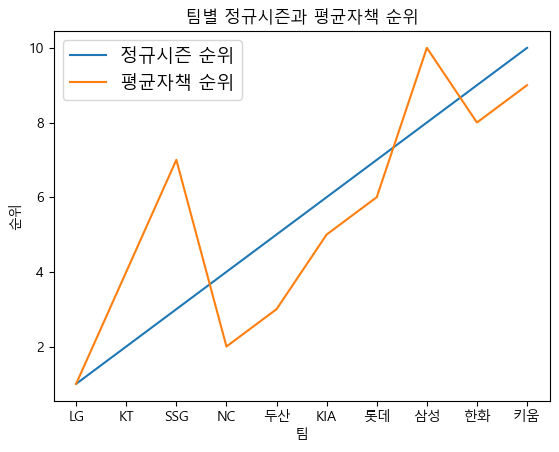

In [188]:
plt.plot(pit_rank_data.index,pit_rank_data['순위'].astype(int),label='정규시즌 순위')
plt.plot(pit_rank_data.index,pit_rank_data['순위(평균자책)'].astype(int),label='평균자책 순위')
plt.xlabel('팀')
plt.ylabel('순위')
plt.title('팀별 정규시즌과 평균자책 순위')
plt.legend(loc='best',ncol=1,fontsize=13,frameon=True)

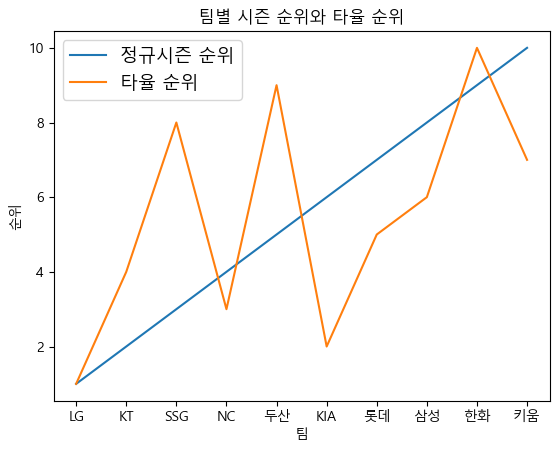

In [222]:
plt.plot(pit_rank_data.index,bat_rank_data['순위'].astype(int),label='정규시즌 순위')
plt.plot(pit_rank_data.index,bat_rank_data['순위(타율)'].astype(int),label='타율 순위')
plt.xlabel('팀')
plt.ylabel('순위')
plt.title('팀별 시즌 순위와 타율 순위')
plt.legend(loc='best',ncol=1,fontsize=13,frameon=True)

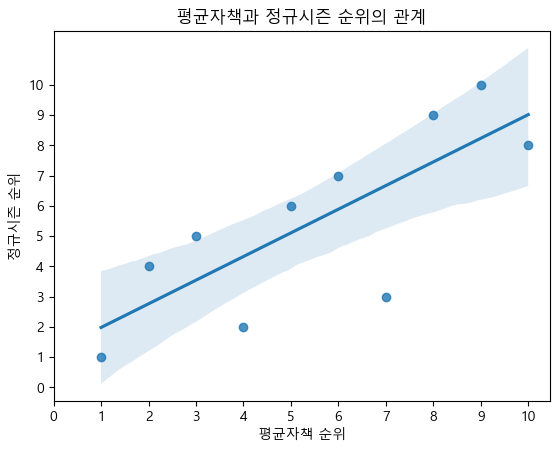

In [215]:
# 정규 순위와 투수의 산점도
p_r_x=pit_rank_data['순위(평균자책)'].astype(int)
p_r_y=pit_rank_data['순위'].astype(int)
sns.regplot(x=p_r_x, y=p_r_y)

# 축과 제목 설정
plt.xlabel('평균자책 순위')
plt.ylabel('정규시즌 순위')
plt.title('평균자책과 정규시즌 순위의 관계')
plt.xticks(range(11))
plt.yticks(range(11))

# 그래프 보여주기
plt.show()

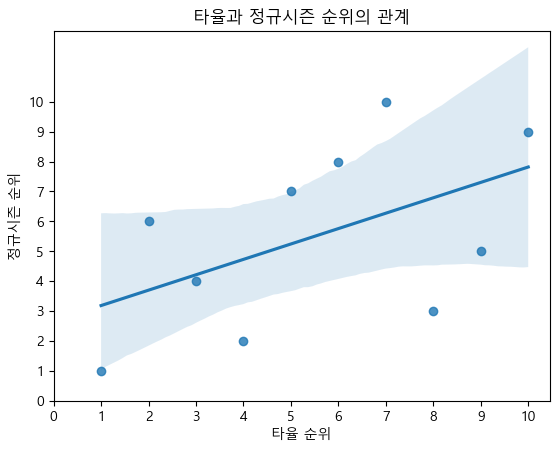

In [216]:
# 정규 순위와 투수의 산점도
b_r_x=bat_rank_data['순위(타율)'].astype(int)
b_r_y=bat_rank_data['순위'].astype(int)
sns.regplot(x=b_r_x, y=b_r_y)

# 축과 제목 설정
plt.xlabel('타율 순위')
plt.ylabel('정규시즌 순위')
plt.title('타율과 정규시즌 순위의 관계')
plt.xticks(range(11))
plt.yticks(range(11))

# 그래프 보여주기
plt.show()

In [219]:
#상관계수는 0~1까지 중 0.3~0.7까지는 뚜렷한 양적 선형관계, 0.7~1까지는 강한 양적 선형관계
relation_p_r=np.corrcoef(p_r_x,p_r_y)[0,1]#투수와 정규시즌 순위의 상관계수
relation_b_r=np.corrcoef(b_r_x,b_r_y)[0,1]#타자와 정규시즌 순위의 상관계수
print(f'투수와 정규시즌 순위의 상관계수: {relation_p_r}')
print(f'타자와 정규시즌 순위의 상관계수: {relation_b_r}')

투수와 정규시즌 순위의 상관계수: 0.7818181818181817
타자와 정규시즌 순위의 상관계수: 0.5151515151515151
